# Activation Function Impact

## Import Dataset MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

X: np.ndarray  # input
y: np.ndarray  # target

# Load data from https://www.openml.org/search?type=data&sort=runs&id=554   
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

 
# MNIST: dataset of 28x28 pixel images of handwritten digits (0-9)
# Input: vector of 784 pixels (28x28)
# Target: number 0-9

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

## Use only 400 data

In [3]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(
    X, y, 
    train_size=400, 
    stratify=y, 
    random_state=42
)

#### Check Class Balances

In [4]:
unique, counts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))

Class counts: {'0': 39, '1': 45, '2': 40, '3': 41, '4': 39, '5': 36, '6': 39, '7': 42, '8': 39, '9': 40}


In [5]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['7', '7', '8', '4', '4', '5', '8', '4', '3', '9', '1', '2', '6',
        '8', '8', '5', '6', '2', '0', '7', '8', '8', '3', '8', '5', '4',
        '6', '7', '7', '3', '0', '1', '0', '9', '0', '9', '1', '5', '4',
        '6', '2', '4', '5', '9', '4', '1', '4', '3', '8', '0', '7', '9',
        '0', '7', '6', '2', '5', '5', '7', '1', '9', '3', '1', '2', '6',
        '3', '3', '6', '6', '0', '1', '1', '7', '2', '4', '7', '8', '6',
        '2', '1', '3', '8', '5', '1', '2', '2', '5', '9', '1', '4', '7',
        '7', '5', '3', '2', '7', '7', '3', '1', '9', '4', '4', '1', '1',
        '5', '6', '3', '9', '8', '0', '9', '2', '9', '0', '5', '8', '3',
        '5', '8', '5', '4', '0', '5', '5', '9', '6', '9', '6', '6', '3',
        '6', '6', '4', '3', '3', '2', '0', '

### Onehot Encode

In [6]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X):
    encoder = OneHotEncoder(sparse_output=False)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    one_hot_encoded = encoder.fit_transform(X)
    return one_hot_encoded

In [7]:
y_encoded = one_hot_encode(y)
print(y_encoded)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


## Import Model

In [8]:
import sys
import os

# Get the absolute path of the src directory
sys.path.append(os.path.abspath('../')) 

from model.ffnn import FFNN
from graph.visualize import Visualizer

### Testing Effects of Activation Function

Model architecture would be consisting of 3 layers with the same width. All model uses Mean Squared Error loss function. The last layer always uses ReLu activation function and the one before will be varied. Weight uses normal distribution.

#### A. Linear

In [9]:
ffnnLinear = FFNN([784, 14, 10], loss="mse", active=["linier", "relu"], seed=69, weight="normal", mean=0.5, variance=0.5)
ffnnLinear

Feed Forward Neural Network
> Layers: [784, 14, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N10)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N11)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N12)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N13)
	Neuron(nin=784, activation=linier, label=Hidden-Layer-1_N14)])
	Layer(label=Output-Layer, n

In [10]:
lossLinear, lossLinear_history = ffnnLinear.training(X, y_encoded, 20, 0.01, 4, 1, 0.8)

  0%|          | 0/4 [00:00<?, ?it/s]

Starting Epoch 0


 25%|██▌       | 1/4 [02:52<08:36, 172.24s/it]

Training Loss: 13601220685.338089
Validation Loss: 2.4478821156398646e+34

Starting Epoch 1


 50%|█████     | 2/4 [05:58<06:01, 180.72s/it]

Training Loss: 2.4557374966810554e+34
Validation Loss: 1.4532356228829947e+107

Starting Epoch 2


OverflowError: (34, 'Result too large')

In [ ]:
Visualizer.plot_loss_history(lossLinear_history)

#### B. ReLu

In [34]:
ffnnReLu = FFNN([784, 14, 10], loss="mse", active=["relu", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnReLu

Feed Forward Neural Network
> Layers: [784, 14, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N10)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N11)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N12)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N13)
	Neuron(nin=784, activation=relu, label=Hidden-Layer-1_N14)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=14, act

In [15]:
ffnnReLu, ffnnReLu_history = ffnnReLu.training(X, y_encoded, 20, 0.01, 4, 1, 0.8)

  0%|          | 0/4 [00:00<?, ?it/s]

Starting Epoch 0


 25%|██▌       | 1/4 [02:49<08:29, 169.82s/it]

Training Loss: 16096497504.08701
Validation Loss: 0.1

Starting Epoch 1


 50%|█████     | 2/4 [05:43<05:44, 172.06s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 2


 75%|███████▌  | 3/4 [08:44<02:56, 176.21s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 3


100%|██████████| 4/4 [11:45<00:00, 176.30s/it]

Training Loss: 0.1
Validation Loss: 0.1



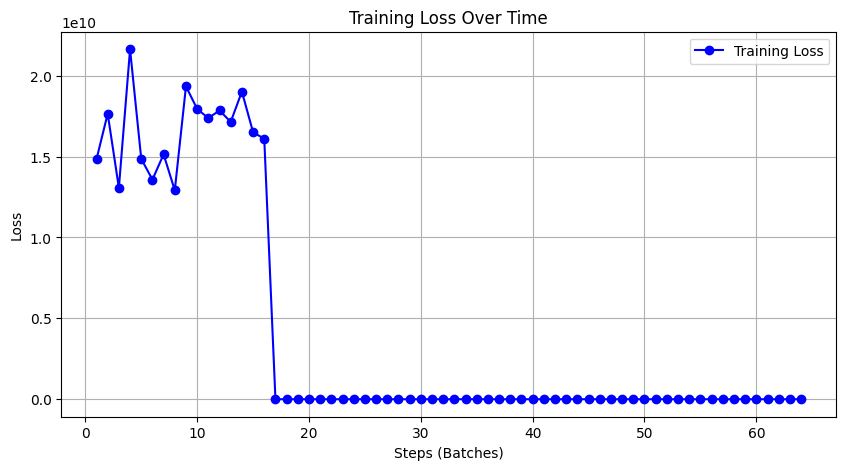

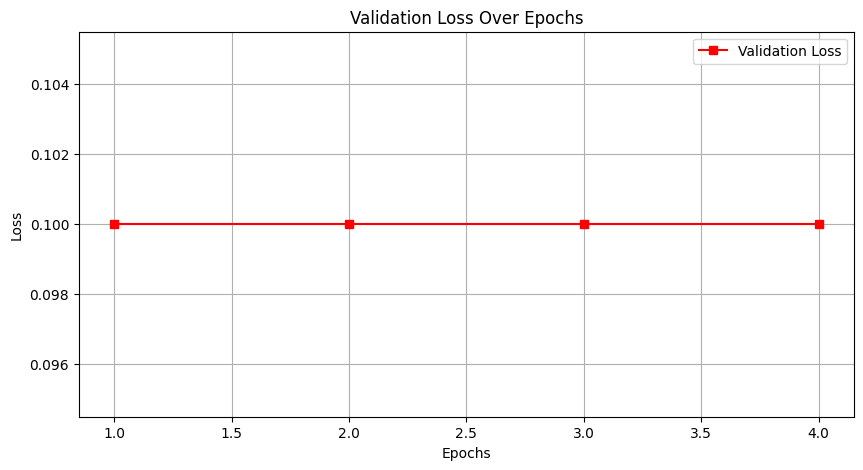

In [16]:
Visualizer.plot_loss_history(ffnnReLu_history)

#### C. Sigmoid

In [32]:
ffnnSigmoid = FFNN([784, 14, 10], loss="mse", active=["sigmoid", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnSigmoid

Feed Forward Neural Network
> Layers: [784, 14, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N10)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N11)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N12)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N13)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N14)])
	Layer(label=O

In [18]:
ffnnSigmoid, lossSigmoid_history = ffnnSigmoid.training(X, y_encoded, 20, 0.01, 4, 1, 0.8)

  0%|          | 0/4 [00:00<?, ?it/s]

Starting Epoch 0


 25%|██▌       | 1/4 [02:50<08:30, 170.07s/it]

Training Loss: 83.6652843598266
Validation Loss: 78.7259483041609

Starting Epoch 1


 50%|█████     | 2/4 [05:29<05:27, 163.94s/it]

Training Loss: 78.72568955416119
Validation Loss: 74.07853453900974

Starting Epoch 2


 75%|███████▌  | 3/4 [08:29<02:50, 170.98s/it]

Training Loss: 74.07802480151018
Validation Loss: 69.70579023111623

Starting Epoch 3


100%|██████████| 4/4 [11:16<00:00, 169.22s/it]

Training Loss: 69.70503703574086
Validation Loss: 65.59148219644256



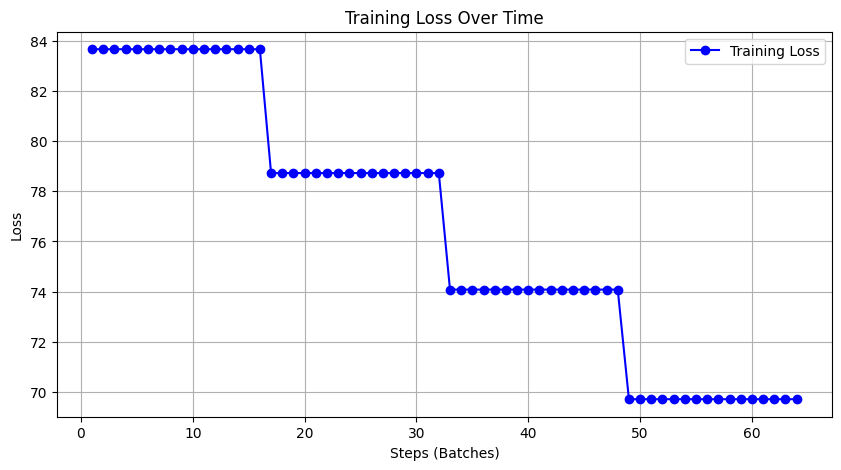

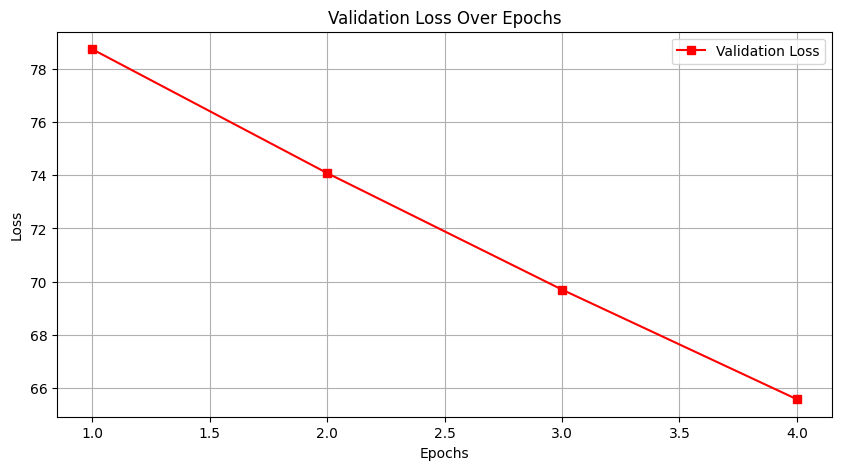

In [19]:
Visualizer.plot_loss_history(lossSigmoid_history)

#### D. Hyperbolic Tangent

In [27]:
ffnnTanH = FFNN([784, 14, 10], loss="mse", active=["tanh", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnnTanH

Feed Forward Neural Network
> Layers: [784, 14, 10]
> MLP of 2 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N8)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N9)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N10)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N11)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N12)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N13)
	Neuron(nin=784, activation=tanh, label=Hidden-Layer-1_N14)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=14, act

In [29]:
ffnnTanH, ffnnTanH_history = ffnnTanH.training(X, y_encoded, 20, 0.01, 4, 1, 0.8)

Starting Epoch 0


OverflowError: math range error

In [ ]:
Visualizer.plot_loss_history(ffnnTanH_history)

## Compare All Results

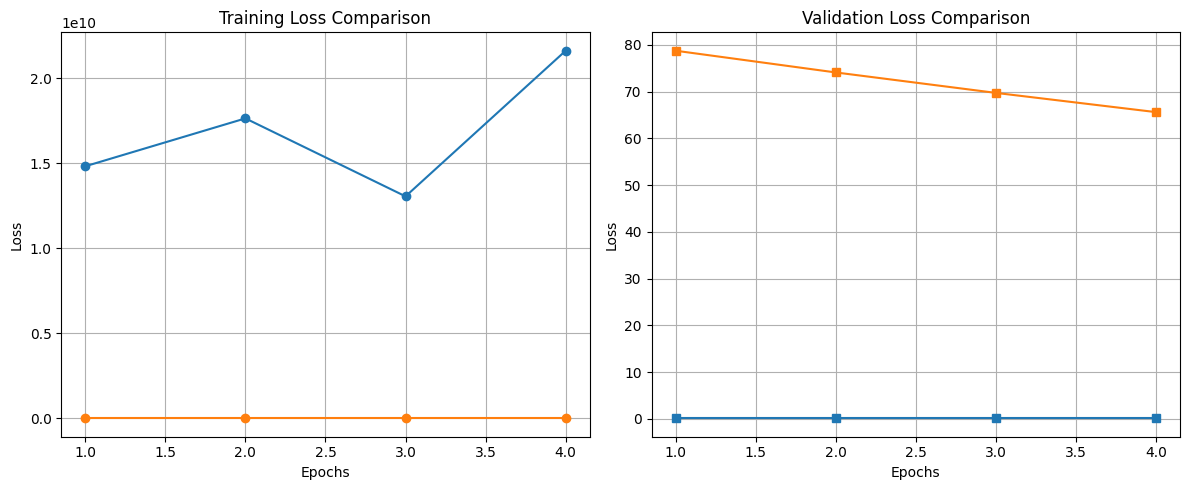

In [30]:
Visualizer.compare_loss_histories([ffnnReLu_history, lossSigmoid_history])

## Comparing The Weight Distribution

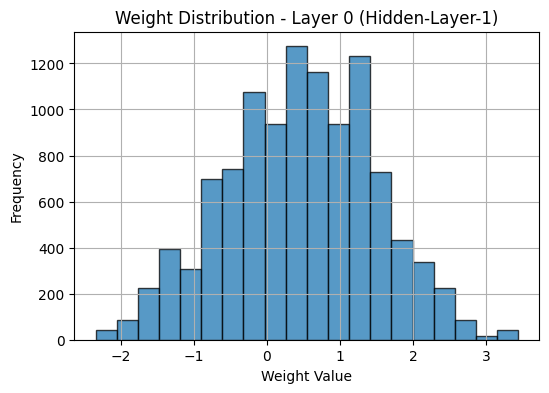

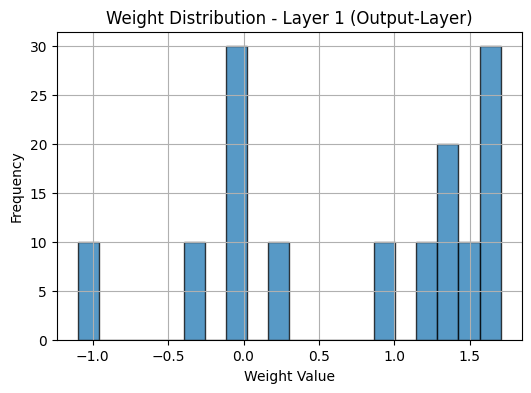

In [36]:
ffnnReLu.plot_weight_distribution([0,1])

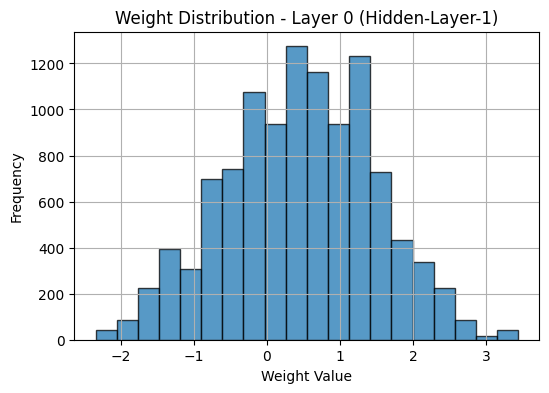

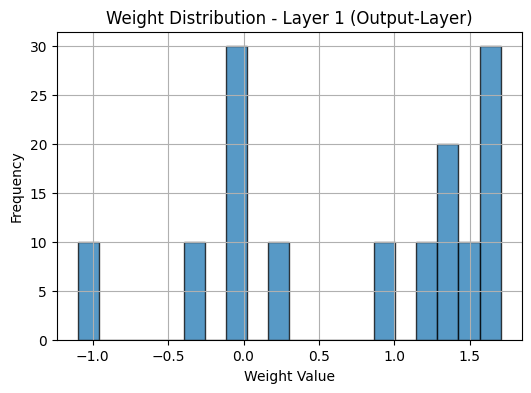

In [37]:
ffnnSigmoid.plot_weight_distribution([0,1])

## Comparing The Gradient Distribution

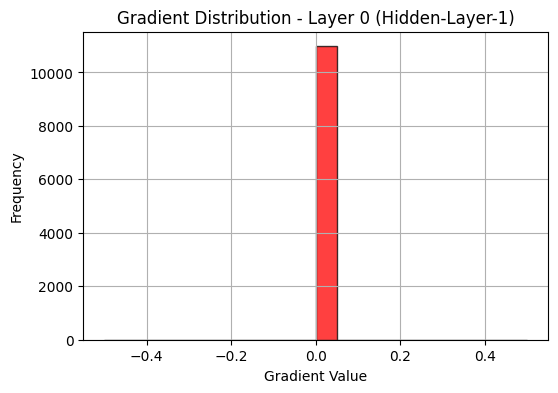

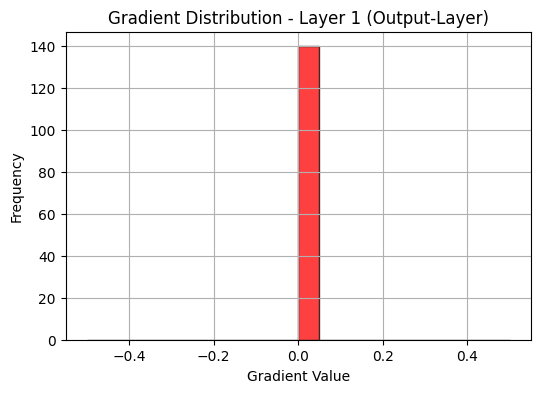

In [38]:
ffnnReLu.plot_gradient_distribution([0,1])

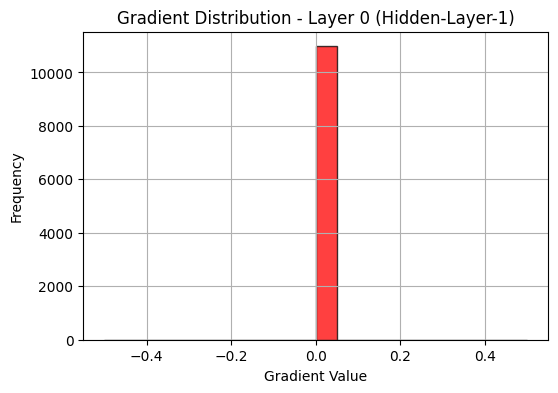

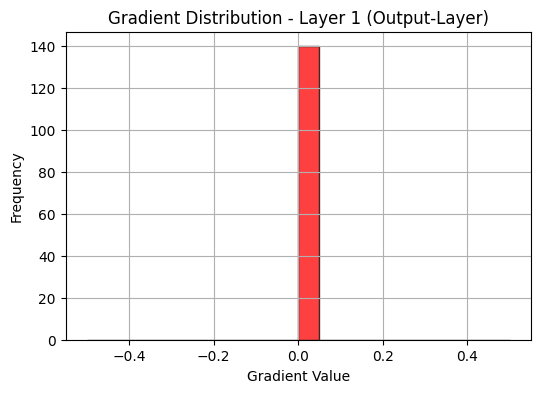

In [39]:
ffnnSigmoid.plot_gradient_distribution([0,1])